In [18]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from collections import Counter

# Load the list of questions from a CSV file
questions_df = pd.read_csv('data.csv')

# Set up a language model in spaCy
nlp = spacy.load('en_core_web_sm')

# Preprocess the questions by removing stop words, lemmatizing the words, and vectorizing the questions
vectorizer = TfidfVectorizer()
question_vectors = vectorizer.fit_transform(questions_df['Question'])

# Cluster the questions using k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(question_vectors)

# Identify the most common questions in each cluster, and use them to form a list of FAQs
faqs = []
for cluster_id in range(3):
    cluster_questions = questions_df.iloc[clusters == cluster_id]['Question']
    question_counts = Counter(cluster_questions)
    most_common_question = question_counts.most_common(1)[0][0]
    faqs.append(most_common_question)

# Print the list of FAQs
for faq in faqs:
    print(faq)

Berapa biaya untuk kuliah di universitas Anda sebagai mahasiswa sarjana?
Berapa biaya tempat tinggal di asrama kampus?
Website resmi universitas?


Sum of distances of the clusters: 1.2194643126451807


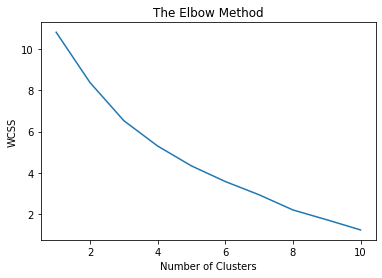

Frequently Asked Questions:
Q1: Berapa biaya tempat tinggal di asrama kampus?
Q2: Alamat website universitas?
Q3: Biaya kuliah untuk program sarjana di universitas untuk program sarjana?


In [22]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt


# Load the list of questions from a CSV file
questions_df = pd.read_csv('data.csv')



# Convert the questions to a TF-IDF matrix
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(questions_df['Question'])




# Use the elbow method to determine the most optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
# Get the sum of distances (inertia) of the clusters
cluster_loss = kmeans.inertia_
print(f'Sum of distances of the clusters: {cluster_loss}')
# Plot the WCSS values against the number of clusters
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the elbow plot, set the number of clusters to the most optimal value
num_clusters = 3




# Apply K-Means clustering to identify frequently asked questions
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)

# Get the cluster labels and add them to the original DataFrame
questions_df['cluster_label'] = kmeans.labels_

# Get the most common question in each cluster to identify the FAQ
faq = []
for i in range(num_clusters):
    cluster_df = questions_df[questions_df['cluster_label'] == i]
    most_common_question = cluster_df['Question'].value_counts().index[0]
    faq.append(most_common_question)

# Print the FAQ
print('Frequently Asked Questions:')
for i, q in enumerate(faq):
    print(f'Q{i+1}: {q}')



# print("ConfusionMatrix",confusion_matrix(questions_df['cluster_label'],kmeans.labels_))
# print(classification_report(questions_df['cluster_label'],kmeans.labels_))




# X_dense = X.toarray()
# cluster_labels = kmeans.labels_
# cluster_centers = kmeans.cluster_centers_
# # Visualize the clusters with their centroids
# colors = ['r', 'g', 'b', 'y']
# for i in range(num_clusters):
#     plt.scatter(X_dense[cluster_labels == i, num_clusters], X_dense[cluster_labels == i, 1], s=50, c=colors[i], label=f'Cluster {i+1}')
# plt.scatter(cluster_centers[:, num_clusters], cluster_centers[:, 1], s=200, marker='*', c='black', label='Centroids')
# plt.title('Clusters of Frequently Asked Questions')
# plt.xlabel('TF-IDF Vector 1')
# plt.ylabel('TF-IDF Vector 2')
# plt.legend()
# plt.show()





# Visualize two
# colors = ['r', 'g', 'b']
# X_dense = X.toarray()
# for i in range(len(colors)):
#     plt.scatter(X_dense[cluster_labels == i, 3], X_dense[cluster_labels == i, 1], s=50, c=colors[i], label=f'Cluster {i+1}')
# plt.scatter(cluster_centers[:, 3], cluster_centers[:, 1], s=200, marker='*', c='black', label='Centroids')
# plt.show()


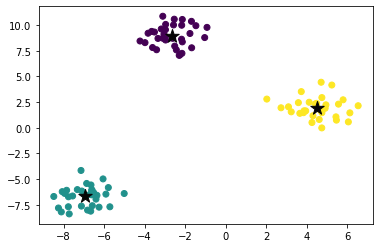

In [42]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate a random dataset for clustering
X, y = make_blobs(n_samples=100, centers=3, random_state=42)

# Fit a KMeans model with k=3 clusters using the Euclidean distance
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=0.0001, algorithm='elkan')
kmeans.fit(X)

# Get the cluster labels and cluster centers
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Plot the data points and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='*', s=200, c='#050505')

plt.show()
